## Bike Crossing Across the Fremont Bridge

In [6]:
#File Reading
#Emma Anderson, Big Data, 1/22/16
#open and save the file for reading
data_file = open("FreBridge.csv", "r");
import numpy as np
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

#create an empty list to store the data
data_list = [];
#put all lines from the file into a list
for ii in data_file:
    data_list.append(ii);

#remove the first element (column header)
del data_list[0];

#create empty lists for westbound and eastbound bikes
west = [];
east = [];    
for jj in range(len(data_list)):
    #strip off the \n (newline)
    data_list[jj] = data_list[jj].replace("\n", "");
    #make into a list of lists of just numbers
    data_list[jj] = data_list[jj].split(",");
    #add data to specific lists for west and east
    west.append(int(data_list[jj][1]));
    east.append(int(data_list[jj][2]));

#print the mean median and mode of the western crossings and the eastern crossings
#in the case that there is no unique mode, catch the error
try:
    print("West Mode:",statistics.mode(west))
except:
    print("West Mode: FAILED -- Multiple Modes")
    
print("West Median:",statistics.median(west))
print("West Mean:",statistics.mean(west))

#space between data
print()

#in the case that there is no unique mode, catch the error
try:
    print("East Mode:",statistics.mode(east))
except:
    print("East Mode: FAILED -- Multiple Modes")
print("East Median:",statistics.median(east))
print("East Mean:",statistics.mean(east))



West Mode: 1
West Median: 47
West Mean: 73.76331360946746

East Mode: FAILED -- Multiple Modes
East Median: 53
East Mean: 77.01183431952663


Based off of these results, I feel that the mean is the best representation of the data.  I feel this because due to the great range of the data points, the mean is closest to the most points, most of the time.  The mode will fail if there are two equal modes found, making it a bad representator of the data.  The medians are values that are slightly low compared to the range of the data, making this a bad representator of the data.  For this reason, I believe that the mean is the best representation of the data.

(array([ 69.,  44.,  23.,   9.,  12.,   2.,   1.,   2.,   2.,   5.]),
 array([   0. ,   38.3,   76.6,  114.9,  153.2,  191.5,  229.8,  268.1,
         306.4,  344.7,  383. ]),
 <a list of 10 Patch objects>)

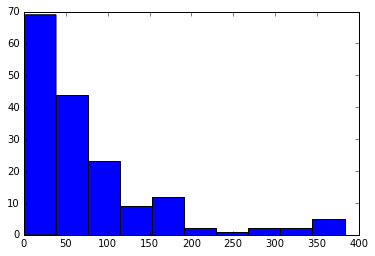

In [3]:
#plot the histogram for the western crossings
plt.hist(west)

(array([ 73.,  58.,  14.,   9.,   5.,   2.,   3.,   1.,   0.,   4.]),
 array([   0. ,   48.7,   97.4,  146.1,  194.8,  243.5,  292.2,  340.9,
         389.6,  438.3,  487. ]),
 <a list of 10 Patch objects>)

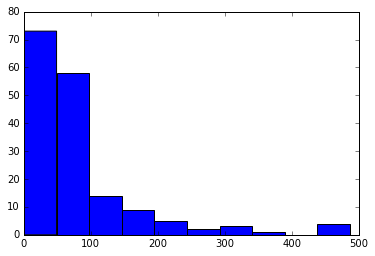

In [10]:
#plot the histogram for the eastern crossings
plt.hist(east)

# Predicting the number of crossing on any Friday in July

In [15]:
#import math which we use later
import math
#import the data file
data_file2 = open("Fremont.csv", "r")

#create empty lists for westbound and eastbound bikes
date = []
west2 = [];
east2 = [];

#create a list of all items from the data file
data_list2 = []
for r in data_file2:
    data_list2.append(r);
    
#remove the first element (column header)
del data_list2[0];

#split the information from our data file into seperate lists for west, east, and date points
for jj in range(len(data_list2)):
    #strip off the \n (newline)
    data_list2[jj] = data_list2[jj].replace("\n", "");
    #make into a list of lists of just numbers
    data_list2[jj] = data_list2[jj].split(",");
    #add data to specific lists for west and east
    date.append(str(data_list2[jj][0]))
    west2.append(int(data_list2[jj][1]));
    east2.append(int(data_list2[jj][2]));
    
#define the first fridayin the list
friString = "12/25/2015"

#create a list for all the fridays in july
julyDates = []
julyW = []
julyE = []
julyAll = []

#go through all days to find fridays in july
#define a variable to store the index of the first friday in the list
firstFridayIndex = 0

#find the index of a first friday as a refernce variable
while (date[firstFridayIndex] != friString):
    firstFridayIndex += 1
    
#itterate every 7 days and check which month it is
for day in range(math.floor(len(date)/7)):
    thisDate = date[firstFridayIndex + (day*7)]
    thisMonth = thisDate[0] + thisDate[1]
    #if the month is july, add the index to a list
    if(thisMonth == "07"):
        julyDates.append(firstFridayIndex + (day*7))
    
#create the july west and east lists, along with a combined west and east list
for dateIndex in range(len(julyDates)):
    #put the traffic data into the the west and east lists
    julyW.append(west2[julyDates[dateIndex]])
    julyE.append(east2[julyDates[dateIndex]])
    #append the data for the cummulative crossings
    julyAll.append(west2[julyDates[dateIndex]] + east2[julyDates[dateIndex]])

#calculate mean of west, east, and the combined lists
fridayJulyWestMean = statistics.mean(julyW)
fridayJulyEastMean = statistics.mean(julyE)
fridayJulyAll = statistics.mean(julyAll)

#print the calculated means
#use math.floor because you can only have a crossing or not have a crossing, we must round down to make whole numbers
print("Expected crossings on west side of the bridge:", math.floor(fridayJulyWestMean))
print("Expected crossings on east side of the bridge:", math.floor(fridayJulyEastMean))
print("Expected combined crossings on both sides of the bridge on a friday in July:", math.floor(fridayJulyAll))

#calculate a 95% confidence interval
stdvAll = statistics.stdev(julyAll)
minInterval = fridayJulyAll - stdvAll*2
maxInterval = fridayJulyAll + stdvAll*2

print("95% Confidence Interval: (", minInterval,", ", maxInterval, ")",sep="")

Expected crossings on west side of the bridge: 1833
Expected crossings on east side of the bridge: 1838
Expected combined crossings on both sides of the bridge on a friday in July: 3671
95% Confidence Interval: (2642.0866847940047, 4701.605622898303)


By creating a confidence it in unneccesary to remove outliers because the standard deviation takes outliers into account.  This interval creates range in which we can be 95% confident will contain the true mean of people crossing the fremont bridge on any given Friday in July.

## Procedure

To calculate this confidence interval, I first collected every data point from every Friday within the dataset.  To do this, I defined the first Friday from the set, and collected every 7th point.  From this subset, I next checked the month of every Friday point and created a subset of this set of points that were in the month July.

To calculate a prediciton for the number of crossings per day, in both directions, I created a new list with the summation of west and east crossings for each day of the set.

